# Prophet's Library

#### [1. Loading Libraries](#1)
#### [2. Reading the Dataset](#2)
#### [3. Train Test Split](#3)
#### [4. Prophet Model](#4)

### 1. Loading Libraries <a id='1'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# To avoid seeing warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Reading the Dataset <a id='2'></a>

In [2]:
path = '../data/CSV/'
file = 'city_districts.csv'

In [3]:
df = pd.read_csv(path+file)
df.head()

,dispatch_date,city,dist_1,dist_2,dist_18,dist_77,dist_3,dist_5,dist_6,dist_14,dist_17,dist_7,dist_8,dist_9,dist_16,dist_15,dist_22,dist_24,dist_12,dist_19,dist_35,dist_25,dist_26,dist_39
0,2006-01-31,19359,512,794,898,62,468,290,899,1134,642,362,681,638,568,1410,804,1341,1126,1066,1188,1532,701,910
1,2006-02-28,15894,385,712,676,52,444,283,723,830,572,325,654,518,440,1205,649,1027,863,894,1003,1352,572,662
2,2006-03-31,18627,561,817,771,61,533,257,777,1008,664,335,623,683,607,1368,741,1306,1076,954,1111,1678,659,792
3,2006-04-30,18940,466,922,843,49,565,282,759,1025,766,389,598,657,594,1367,767,1325,1126,941,1126,1578,776,721
4,2006-05-31,20041,458,1029,918,62,509,259,867,1100,778,428,664,747,648,1391,837,1259,1164,1038,1242,1642,796,833


In [6]:
# Change the names
df.rename(columns={'dispatch_date':'ds','city':'y'},inplace=True)
# Make sure ds column is a pandas datetime object
df['ds'] = pd.to_datetime(df['ds'])

### 3. Train Test Split <a id='3'></a>

In [7]:
len(df) # to know how many rows we have

160

In [8]:
train = df.iloc[:148]
test = df.iloc[148:]

### 4. Prophet Model <a id='4'></a>

#### 4.1 Additive Model

In [10]:
from fbprophet import Prophet
m = Prophet(seasonality_mode='additive') # 'multiplicative' Find out what is better for your model: RMSE
m.fit(train)
# In Stead of doing df.index.freq = 'MS' as we do in Statsmodel
future = m.make_future_dataframe(periods=12,freq='M')
preds = m.predict(future)
preds.head() # to find out more about the output
# yhat, yhat_lower and yhat_upper are probably the most important terms of this DF
preds[['ds','yhat_lower','yhat_upper','yhat']].tail(12)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat_lower,yhat_upper,yhat
148,2018-05-31,14051.142735,15672.759961,14855.236642
149,2018-06-30,13822.299712,15485.055858,14645.452089
150,2018-07-31,14377.085854,15981.330656,15166.180184
151,2018-08-31,14555.118064,16154.873174,15280.772500
152,2018-09-30,13036.748227,14663.104179,13838.994415
153,2018-10-31,13244.648745,14823.036723,14034.455900
154,2018-11-30,11657.862283,13306.063080,12487.428556
155,2018-12-31,11070.121732,12652.850391,11864.642866
156,2019-01-31,10945.034988,12533.225994,11745.602992
157,2019-02-28,8832.958196,10435.629386,9623.054382


##### 4.1.1 Plotting

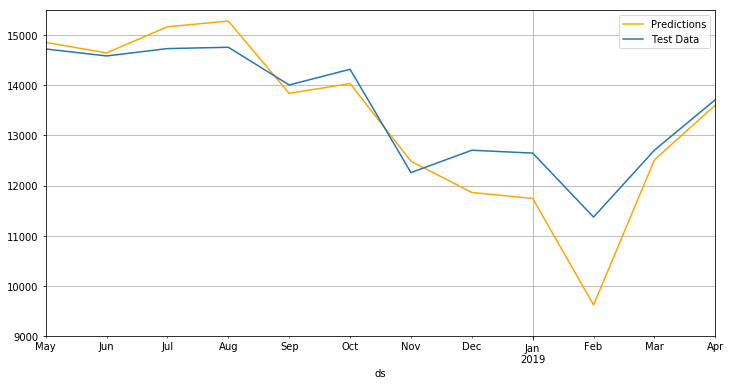

In [24]:
ax = preds.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,6),color='orange')
test.plot(x='ds',y='y',label='Test Data',legend=True,ax=ax,xlim=('2018-05-31','2019-04-30'),ylim=(9000,15500),grid=True);

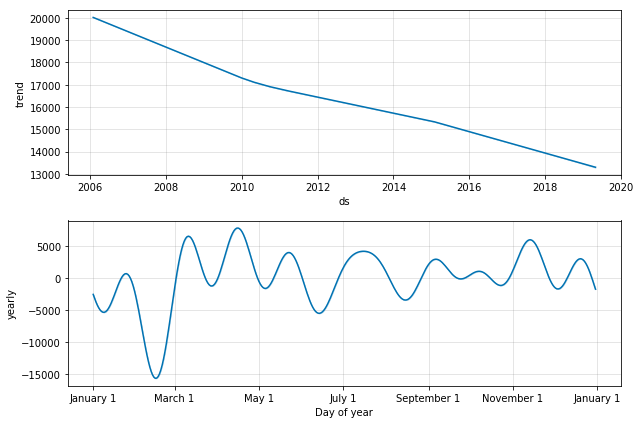

In [25]:
# Trend and Seasonality
m.plot_components(preds);

##### 4.1.2 Evaluate the Model

In [26]:
from statsmodels.tools.eval_measures import rmse
# Alternative:
# from sklearn.metrics import mean_squared_error
RMSE = rmse(test['y'],preds['yhat'][-12:])
RMSE # it should be interesting to compare this value with test['y'].mean()

663.4837129063992

In [27]:
test['y'].mean()

13544.666666666666

#### 4.1 Multiplicative Model

In [28]:
from fbprophet import Prophet
m = Prophet(seasonality_mode='multiplicative') # 'additive' Find out what is better for your model: RMSE
m.fit(train)
# In Stead of doing df.index.freq = 'MS' as we do in Statsmodel
future = m.make_future_dataframe(periods=12,freq='M')
preds = m.predict(future)
preds.head() # to find out more about the output
# yhat, yhat_lower and yhat_upper are probably the most important terms of this DF
preds[['ds','yhat_lower','yhat_upper','yhat']].tail(12)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat_lower,yhat_upper,yhat
148,2018-05-31,13718.489541,15376.960360,14526.021747
149,2018-06-30,13583.279341,15155.235585,14360.896537
150,2018-07-31,13983.576704,15598.376041,14779.049725
151,2018-08-31,14019.038289,15669.188865,14872.918989
152,2018-09-30,12880.282455,14476.861108,13673.869470
153,2018-10-31,13002.421961,14631.230833,13825.797128
154,2018-11-30,11772.726212,13444.984928,12572.466954
155,2018-12-31,11255.922355,12886.642793,12070.664705
156,2019-01-31,11219.939944,12783.909175,12013.074783
157,2019-02-28,9494.016286,11102.185792,10257.788376


##### 4.2.1 Plotting

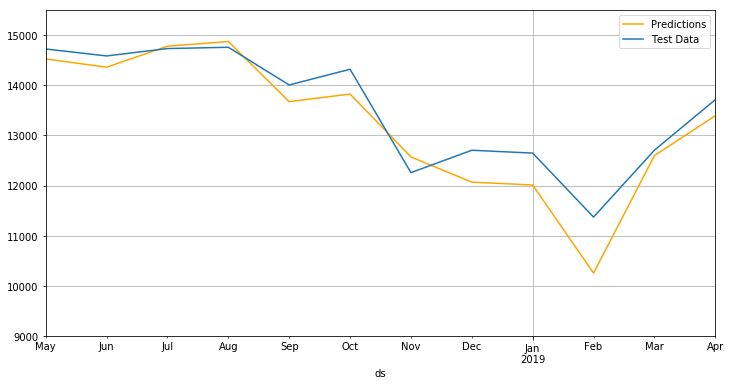

In [29]:
ax = preds.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,6),color='orange')
test.plot(x='ds',y='y',label='Test Data',legend=True,ax=ax,xlim=('2018-05-31','2019-04-30'),ylim=(9000,15500),grid=True);

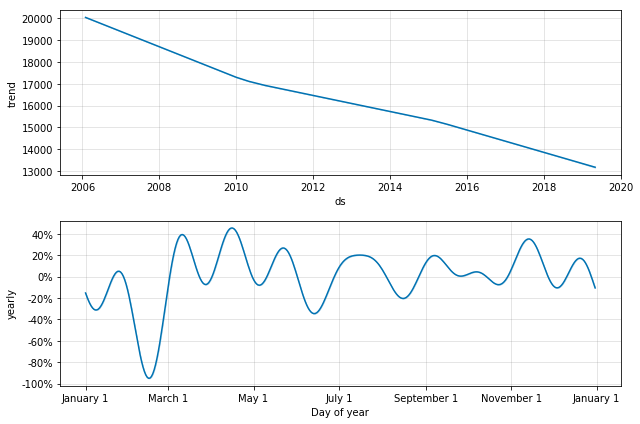

In [30]:
# Trend and Seasonality
m.plot_components(preds);

##### 4.2.2 Evaluate the Model

In [31]:
from statsmodels.tools.eval_measures import rmse
# Alternative:
# from sklearn.metrics import mean_squared_error
RMSE = rmse(test['y'],preds['yhat'][-12:])
RMSE # it should be interesting to compare this value with test['y'].mean()

476.6008543553368

In [32]:
test['y'].mean()

13544.666666666666